# Mental Health Encoding Among Teenagers


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as pyo
import plotly.express as px
from IPython.display import IFrame

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv("mental_health_analysis.csv")


         # Question 1: How big is our data?
         # Question 2: Is there any null or NAN value?
        # Question 3: Is there any duplicate value?
      # Question 4: What all dtypes dataset has?
        # Question 5: How does it look like mathematically?
       # Question 6: How does it look like?
    

In [5]:
data.shape

(5000, 11)

In [6]:
data.isnull().sum()

User_ID                  0
Age                      0
Gender                   0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Social_Media_Hours     5000 non-null   float64
 4   Exercise_Hours         5000 non-null   float64
 5   Sleep_Hours            5000 non-null   float64
 6   Screen_Time_Hours      5000 non-null   float64
 7   Survey_Stress_Score    5000 non-null   int64  
 8   Wearable_Stress_Score  5000 non-null   float64
 9   Support_System         5000 non-null   object 
 10  Academic_Performance   5000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


In [9]:
data.describe()

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,15.493200,4.932081,1.498151,7.057370,7.068630,3.015800,0.496618
std,1443.520003,1.715151,2.853928,0.873984,1.722211,2.883494,1.414762,0.289768
min,1.000000,13.000000,0.000528,0.000473,4.001515,2.000481,1.000000,0.000102
25%,1250.750000,14.000000,2.473150,0.734431,5.611836,4.574327,2.000000,0.244615
50%,2500.500000,16.000000,4.898176,1.483432,7.068874,7.118979,3.000000,0.500404
75%,3750.250000,17.000000,7.369195,2.276089,8.519411,9.526335,4.000000,0.749929
max,5000.000000,18.000000,9.995052,2.999774,9.999229,11.999010,5.000000,0.999812


In [10]:
data.head(10)

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
5,6,14,M,9.774382,1.046108,9.282089,5.677747,5,0.070586,Low,Poor
6,7,15,F,9.643532,2.290941,4.790720,8.860167,4,0.953354,Low,Excellent
7,8,15,F,1.637290,0.290854,4.733405,8.026163,4,0.910201,Moderate,Poor
8,9,15,M,2.994231,1.053651,6.963850,7.252061,5,0.117732,Low,Poor
9,10,17,M,1.001550,2.511720,5.658463,10.904165,2,0.183585,Moderate,Good



#    Exploratory data analysis


In [12]:
fig = px.box(
    data, 
    x="Academic_Performance", 
    y="Social_Media_Hours", 
    color="Academic_Performance", 
    title="Box Plot of Social_Media_Hours by Academic_Performance"
)

#fig.show()
pyo.plot(fig, filename="boxplot_academic_performance.html", auto_open=False)
IFrame("boxplot_academic_performance.html", width=900, height=600)

In [13]:
fig = px.scatter_matrix(
    data, 
    dimensions=['Age', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours',
                'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score'], 
    color="Academic_Performance", 
    title="Pair Plot"
)
#fig.show()
pyo.plot(fig, filename="pair_plot.html", auto_open=False)
IFrame("pair_plot.html", width=1200, height=900)

In [14]:
fig = px.scatter_3d(
    data, 
    x='Social_Media_Hours', 
    y='Screen_Time_Hours', 
    z='Wearable_Stress_Score', 
    color='Academic_Performance', 
    title="3D Scatter Plot"
)
#fig.show()
pyo.plot(fig, filename="3d_scatter_plot.html", auto_open=False)
IFrame("3d_scatter_plot.html",width=1200, height=800)

In [15]:
fig = px.treemap(
    data, 
    path=["Academic_Performance"], 
    values="Age", 
    title="Treemap of Age by Academic Performance"
)
#fig.show()
pyo.plot(fig, filename="treemap_academic_performance.html", auto_open=False)
IFrame("treemap_academic_performance.html",width=900, height=600)

In [16]:
fig = px.density_contour(
    data, 
    x='Screen_Time_Hours', 
    y='Survey_Stress_Score', 
    color="Academic_Performance", 
    title="Density Contour Plot"
)
#fig.show()
pyo.plot(fig, filename="density_contour_plot.html", auto_open=False)
IFrame("density_contour_plot.html", width=900, height=600)

In [17]:
import plotly.figure_factory as ff

species_list = data["Academic_Performance"].unique()
hist_data = [data[data["Academic_Performance"] == species]['Survey_Stress_Score'] for species in species_list]

fig = ff.create_distplot(
    hist_data, 
    species_list, 
    show_hist=False,  
    show_rug=True     
)

fig.update_layout(title="Ridgeline Plot of Survey Stress Score")
#fig.show()

pyo.plot(fig, filename="ridgeline_plot.html", auto_open=False)
IFrame("ridgeline_plot.html", width=900, height=600)

In [18]:
fig = px.sunburst(
    data, 
    path=["Gender", "Support_System", "Academic_Performance"], 
    values="Social_Media_Hours", 
    title="Sunburst Chart of Academic Performance"
)

#fig.show()
pyo.plot(fig, filename="sunburst_chart.html", auto_open=False)
IFrame("sunburst_chart.html", width=900, height=600)


#    Checking for data distribution



In [20]:
numerical_cols = data.select_dtypes(include =  ["int", "float"])
categorical_cols = data.select_dtypes(include = "object")

In [21]:
for col in numerical_cols:
    skew = data[col].skew()
    kurt = data[col].kurtosis()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

User_ID: Skewness = 0.00, Kurtosis = -1.20
Age: Skewness = -0.01, Kurtosis = -1.28
Social_Media_Hours: Skewness = 0.03, Kurtosis = -1.17
Exercise_Hours: Skewness = 0.01, Kurtosis = -1.22
Sleep_Hours: Skewness = -0.04, Kurtosis = -1.17
Screen_Time_Hours: Skewness = -0.03, Kurtosis = -1.19
Survey_Stress_Score: Skewness = -0.01, Kurtosis = -1.30
Wearable_Stress_Score: Skewness = 0.01, Kurtosis = -1.21


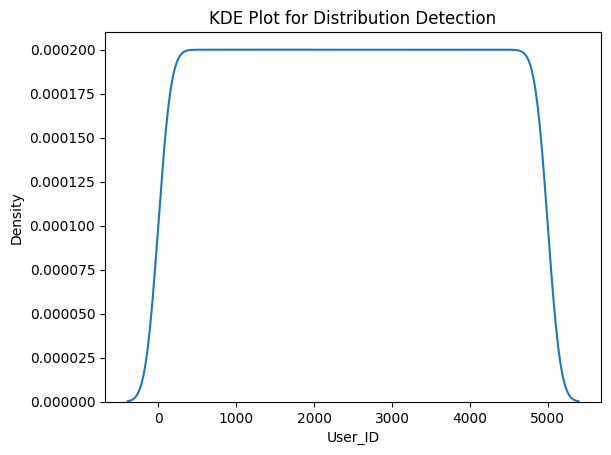


User_ID follows a beta distribution (Symmetric)
  Skewness: 0.00, Kurtosis: -1.20
  P-values for all distributions: {'norm': 1.0283487200206771e-14, 'expon': 2.479788147661778e-103, 'lognorm': 1.0180375264138509e-14, 'gamma': 1.0263501451532605e-14, 'beta': 1.0, 'chi2': 2.861819164439973e-17, 'cauchy': 5.140019357958498e-73, 'uniform': 1.0, 'powerlaw': 0.9999999999914267}


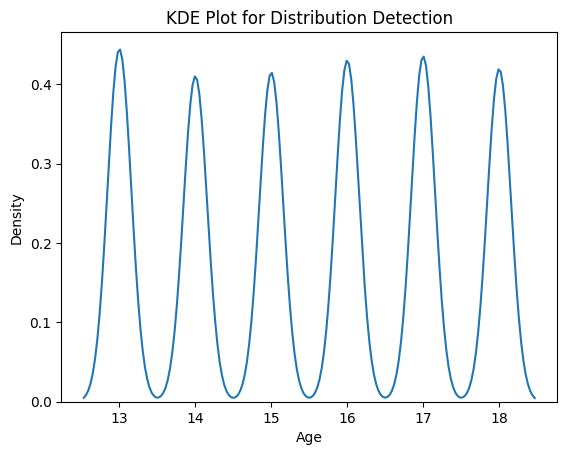


Age follows a norm distribution (Symmetric)
  Skewness: -0.01, Kurtosis: -1.28
  P-values for all distributions: {'norm': 6.064932428504943e-92, 'expon': 2.8123977170749497e-207, 'lognorm': 0.0, 'gamma': 4.323680669361858e-92, 'beta': 7.411073437793225e-133, 'chi2': 0.0, 'cauchy': 8.7959777305765e-103, 'uniform': 7.411073437463707e-133, 'powerlaw': 0.0}


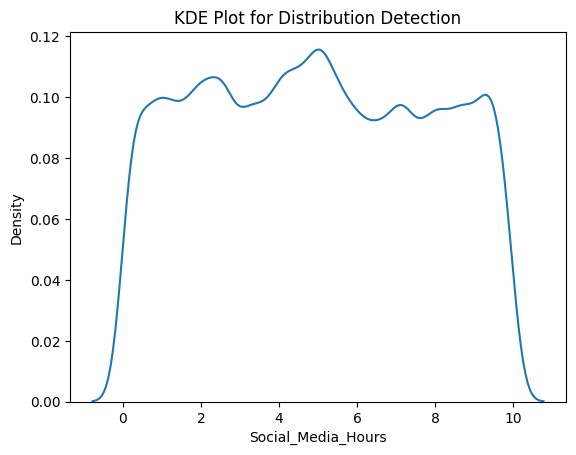


Social_Media_Hours follows a beta distribution (Symmetric)
  Skewness: 0.03, Kurtosis: -1.17
  P-values for all distributions: {'norm': 9.38629543443891e-16, 'expon': 6.805656354342336e-110, 'lognorm': 1.026197053415436e-14, 'gamma': 2.0186824261436368e-15, 'beta': 0.5498644712806073, 'chi2': 9.9633663533122e-18, 'cauchy': 6.161165320423966e-73, 'uniform': 0.018284914074306984, 'powerlaw': 0.20648381029084595}


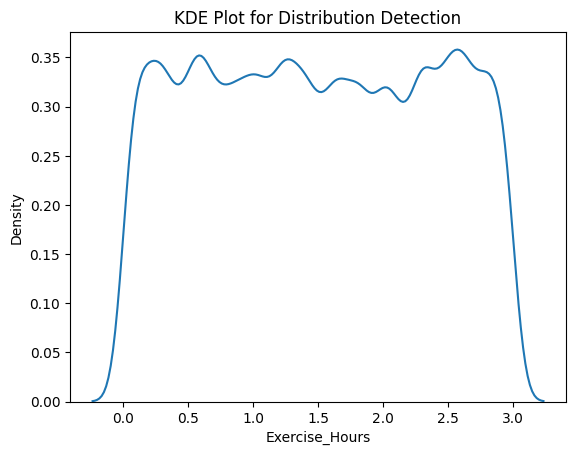


Exercise_Hours follows a uniform distribution (Symmetric)
  Skewness: 0.01, Kurtosis: -1.22
  P-values for all distributions: {'norm': 1.5482290324680044e-19, 'expon': 2.621269061509867e-101, 'lognorm': 9.039157406642815e-20, 'gamma': 1.344690831240041e-19, 'beta': 2.5135904034786687e-08, 'chi2': 2.9429863426788677e-122, 'cauchy': 4.9840738047396906e-76, 'uniform': 0.5665560020411735, 'powerlaw': 0.2613936332353388}


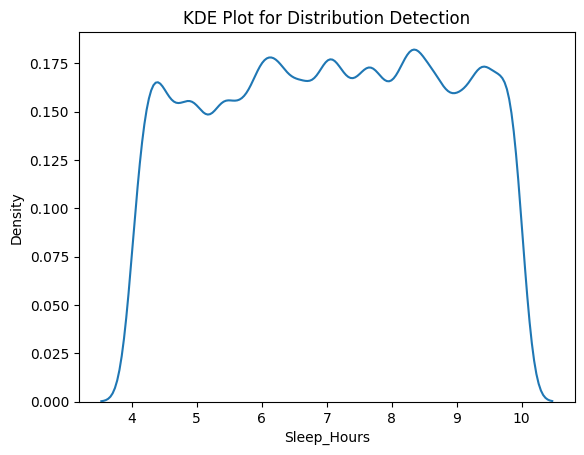


Sleep_Hours follows a beta distribution (Symmetric)
  Skewness: -0.04, Kurtosis: -1.17
  P-values for all distributions: {'norm': 3.2119647268417088e-15, 'expon': 5.039971944735834e-125, 'lognorm': 3.2110069142862515e-15, 'gamma': 1.3942651417399179e-15, 'beta': 0.7453836364952084, 'chi2': 9.871903707833148e-20, 'cauchy': 3.597285363043679e-75, 'uniform': 0.01108895563225457, 'powerlaw': 0.5756105730746908}


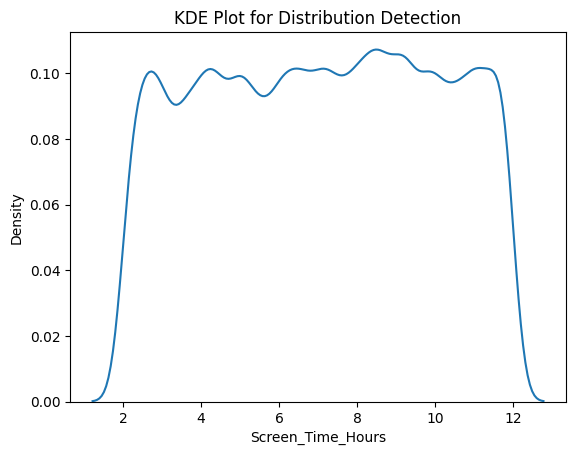


Screen_Time_Hours follows a powerlaw distribution (Symmetric)
  Skewness: -0.03, Kurtosis: -1.19
  P-values for all distributions: {'norm': 2.6987704579212302e-15, 'expon': 6.2728812267185205e-114, 'lognorm': 2.7016689202596293e-15, 'gamma': 5.3567055830278685e-15, 'beta': 0.7901080573859731, 'chi2': 6.765341841968959e-19, 'cauchy': 3.272100610909322e-76, 'uniform': 0.24700439296528764, 'powerlaw': 0.8953348295692534}


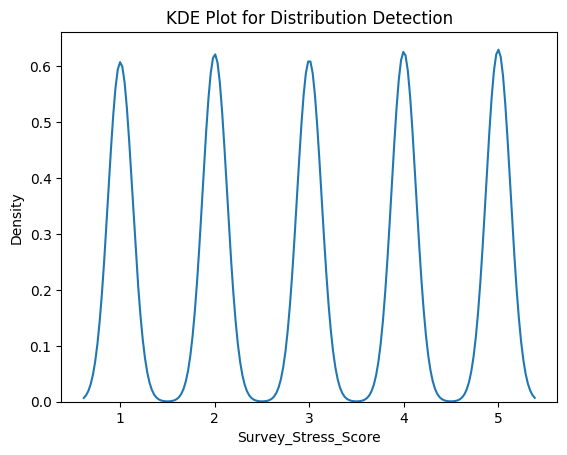


Survey_Stress_Score follows a cauchy distribution (Symmetric)
  Skewness: -0.01, Kurtosis: -1.30
  P-values for all distributions: {'norm': 1.5043679506633042e-115, 'expon': 1.389446780717618e-237, 'lognorm': 0.0, 'gamma': 5.13388878018045e-116, 'beta': 7.686690861785836e-182, 'chi2': 0.0, 'cauchy': 1.0762800186557515e-108, 'uniform': 7.686690856747627e-182, 'powerlaw': 0.0}


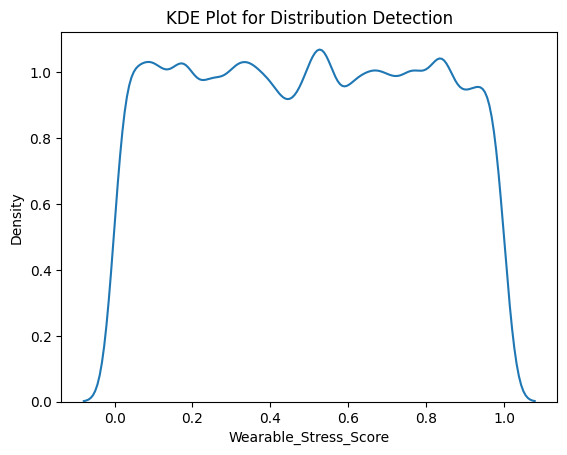


Wearable_Stress_Score follows a beta distribution (Symmetric)
  Skewness: 0.01, Kurtosis: -1.21
  P-values for all distributions: {'norm': 3.9281472832402907e-16, 'expon': 2.09358605366785e-100, 'lognorm': 3.3345997214077134e-16, 'gamma': 4.1124916436377705e-16, 'beta': 0.9392316562966684, 'chi2': 4.929819510483029e-19, 'cauchy': 9.61617588809931e-75, 'uniform': 0.6921088882637215, 'powerlaw': 0.6120024886947512}


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
def detect_distribution(column_data):
    distributions = ['norm', 'expon', 'lognorm', 'gamma', 'beta', 'chi2', 'cauchy', 'uniform', 'powerlaw']
    results = {}
    for dist in distributions:
        try:
            dist_obj = getattr(stats, dist)
            params = dist_obj.fit(column_data)  
            ks_stat, p_value = stats.kstest(column_data, dist, args=params)
            results[dist] = p_value 
        except Exception as e:
            results[dist] = 0  

    best_fit = max(results, key=results.get)
    skewness = stats.skew(column_data)
    kurtosis = stats.kurtosis(column_data)

    # Check for skewness
    if skewness < -0.5:
        shape = "Left-Skewed"
    elif skewness > 0.5:
        shape = "Right-Skewed"
    else:
        shape = "Symmetric"

    # Check for multimodality using KDE
    sns.kdeplot(column_data, bw_adjust=0.5)
    plt.title(f"KDE Plot for Distribution Detection")
    plt.show()
    return best_fit, shape, skewness, kurtosis, results
    
for col in numerical_cols:
    column_data = data[col].dropna()
    best_fit, shape, skew, kurt, all_results = detect_distribution(column_data)
    print(f"\n{col} follows a {best_fit} distribution ({shape})")
    print(f"  Skewness: {skew:.2f}, Kurtosis: {kurt:.2f}")
    print(f"  P-values for all distributions: {all_results}")